<a href="https://colab.research.google.com/github/engimine/-engiminer-.github.io./blob/main/Copia_de_zeolitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese las proporciones de zeolita a probar (en %, separadas por comas): 0, 20, 40, 60, 80, 100

Resultados de la simulación:
Porc. Zeolita (%) | Conductividad (W/mK) | Resistencia (MPa) | Densidad (kg/m3) | Reducción peso (%)
   0.0%         |    1.700 W/mK       |   30.00 MPa      |  2400.0 kg/m3    |     0.0%
  20.0%         |    1.580 W/mK       |   28.00 MPa      |  2280.0 kg/m3    |     5.0%
  40.0%         |    1.460 W/mK       |   26.00 MPa      |  2160.0 kg/m3    |    10.0%
  60.0%         |    1.340 W/mK       |   24.00 MPa      |  2040.0 kg/m3    |    15.0%
  80.0%         |    1.220 W/mK       |   22.00 MPa      |  1920.0 kg/m3    |    20.0%
 100.0%         |    1.100 W/mK       |   20.00 MPa      |  1800.0 kg/m3    |    25.0%


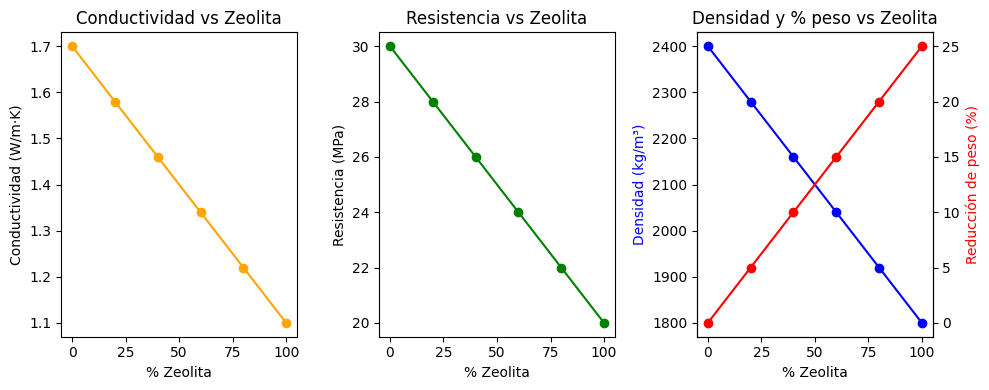

In [ ]:
import matplotlib.pyplot as plt

def conductividad_termica(perc_zeolita):
    """
    Calcula la conductividad térmica estimada (W/m·K) del hormigón
    con un cierto porcentaje de zeolita (perc_zeolita, en %).
    Utiliza una interpolación lineal entre hormigón tradicional y hormigón con zeolita.
    """
    # Valores base asumidos (hormigón tradicional sin zeolita):
    k_tradicional = 1.7   # W/m·K, conductividad térmica del hormigón convencional&#8203;:contentReference[oaicite:7]{index=7}
    # Valor para hormigón con alta proporción de zeolita:
    k_con_zeolita = 1.1   # W/m·K, conductividad con zeolita (ej: hormigón ligero ~1800 kg/m3)&#8203;:contentReference[oaicite:8]{index=8}

    # Interpolación lineal en función del porcentaje (0 a 100):
    fraccion = perc_zeolita / 100.0
    k_mix = k_tradicional * (1 - fraccion) + k_con_zeolita * fraccion
    return k_mix

def resistencia_compresion(perc_zeolita):
    """
    Estima la resistencia a la compresión (MPa) del hormigón
    con un cierto porcentaje de zeolita, utilizando un modelo de mezcla lineal.
    """
    # Valor base (0% zeolita):
    fc_tradicional = 30.0   # MPa, resistencia a compresión del hormigón convencional (~C30)
    # Valor con zeolita alta (100% de reemplazo de árido pesado por zeolita, por ejemplo):
    fc_con_zeolita = 20.0   # MPa, resistencia reducida en hormigón ligero (~HLE 20 MPa)&#8203;:contentReference[oaicite:9]{index=9}

    # Interpolación lineal según el porcentaje de zeolita:
    fraccion = perc_zeolita / 100.0
    fc_mix = fc_tradicional * (1 - fraccion) + fc_con_zeolita * fraccion
    return fc_mix

def densidad_hormigon(perc_zeolita):
    """
    Calcula la densidad (kg/m3) del hormigón con un porcentaje dado de zeolita,
    suponiendo mezcla lineal entre densidad de hormigón tradicional y hormigón ligero.
    """
    dens_tradicional = 2400.0  # kg/m3, densidad del hormigón tradicional&#8203;:contentReference[oaicite:10]{index=10}
    dens_con_zeolita = 1800.0  # kg/m3, densidad con zeolita (hormigón ligero)&#8203;:contentReference[oaicite:11]{index=11}

    fraccion = perc_zeolita / 100.0
    dens_mix = dens_tradicional * (1 - fraccion) + dens_con_zeolita * fraccion
    return dens_mix

# Solicitar al usuario los porcentajes de zeolita a evaluar:
entrada = input("Ingrese las proporciones de zeolita a probar (en %, separadas por comas): ")
# Procesar la entrada en una lista de valores numéricos (floats)
entrada = entrada.replace('%', '')        # eliminar símbolos de porcentaje si los hubiera
entrada = entrada.replace(',', ' ')       # reemplazar comas por espacios
valores_str = entrada.split()             # dividir por espacios
porcentajes = []
for val in valores_str:
    try:
        p = float(val)
        porcentajes.append(p)
    except:
        print(f"Valor no válido ignorado: '{val}'")

# Eliminar duplicados y ordenar la lista de porcentajes
porcentajes = sorted(set(porcentajes))

# Validar rango 0-100% y calcular propiedades para cada porcentaje
porcentajes_validos = []
conductividades = []
resistencias = []
densidades = []
reducciones_peso = []  # reducción de peso en %

for p in porcentajes:
    # Si está fuera de [0,100], se limita al rango
    if p < 0:
        print(f"Advertencia: {p}% es menor que 0%. Se toma 0% en su lugar.")
        p = 0.0
    if p > 100:
        print(f"Advertencia: {p}% excede 100%. Se toma 100% en su lugar.")
        p = 100.0
    # Calcular propiedades
    k = conductividad_termica(p)
    fc = resistencia_compresion(p)
    dens = densidad_hormigon(p)
    reduccion = (1 - dens / 2400.0) * 100  # % reducción de peso respecto a hormigón tradicional
    # Almacenar resultados
    porcentajes_validos.append(p)
    conductividades.append(k)
    resistencias.append(fc)
    densidades.append(dens)
    reducciones_peso.append(reduccion)

# Mostrar resultados en forma tabular resumida
print("\nResultados de la simulación:")
print("Porc. Zeolita (%) | Conductividad (W/mK) | Resistencia (MPa) | Densidad (kg/m3) | Reducción peso (%)")
for (p, k, fc, dens, red) in zip(porcentajes_validos, conductividades, resistencias, densidades, reducciones_peso):
    print(f"{p:6.1f}%         | {k:8.3f} W/mK       | {fc:7.2f} MPa      | {dens:7.1f} kg/m3    | {red:7.1f}%")

# Generar gráficos comparativos
plt.figure(figsize=(10, 4))

# Subplot 1: Conductividad térmica vs % zeolita
plt.subplot(1, 3, 1)
plt.plot(porcentajes_validos, conductividades, marker='o', color='orange')
plt.xlabel('% Zeolita')
plt.ylabel('Conductividad (W/m·K)')
plt.title('Conductividad vs Zeolita')

# Subplot 2: Resistencia vs % zeolita
plt.subplot(1, 3, 2)
plt.plot(porcentajes_validos, resistencias, marker='o', color='green')
plt.xlabel('% Zeolita')
plt.ylabel('Resistencia (MPa)')
plt.title('Resistencia vs Zeolita')

# Subplot 3: Densidad (y reducción peso) vs % zeolita
plt.subplot(1, 3, 3)
plt.plot(porcentajes_validos, densidades, marker='o', color='blue', label='Densidad (kg/m3)')
# Para indicar la reducción de peso, podemos agregar una segunda escala de eje Y:
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(porcentajes_validos, reducciones_peso, marker='o', color='red', label='Reducción peso (%)')
ax.set_xlabel('% Zeolita')
ax.set_ylabel('Densidad (kg/m³)', color='blue')
ax2.set_ylabel('Reducción de peso (%)', color='red')
plt.title('Densidad y % peso vs Zeolita')
# Opcional: agregar leyenda combinada
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# plt.legend(h1+h2, l1+l2, loc='upper right')

plt.tight_layout()  # ajustar espaciamiento de subplots
plt.show()


=== Simulación de propiedades de un hormigón con zeolita ===
1) Se calculará la conductividad térmica, resistencia a compresión, densidad y % de reducción de peso.
2) Puedes introducir varios valores de porcentaje separados por comas (ej: 0, 20, 40, 60, 80, 100).

Opciones de interpolación disponibles: 'linear' (por defecto) o 'exponential'.

Resultados de la simulación:

Porc. Zeolita (%) |     k (W/mK) |     fc (MPa) |   Dens (kg/m3) |  Reducción (%)
             0.0 |        1.700 |        30.00 |         2400.0 |           0.00
            20.0 |        1.580 |        28.00 |         2280.0 |           5.00
            40.0 |        1.460 |        26.00 |         2160.0 |          10.00
            60.0 |        1.340 |        24.00 |         2040.0 |          15.00
            80.0 |        1.220 |        22.00 |         1920.0 |          20.00
           100.0 |        1.100 |        20.00 |         1800.0 |          25.00


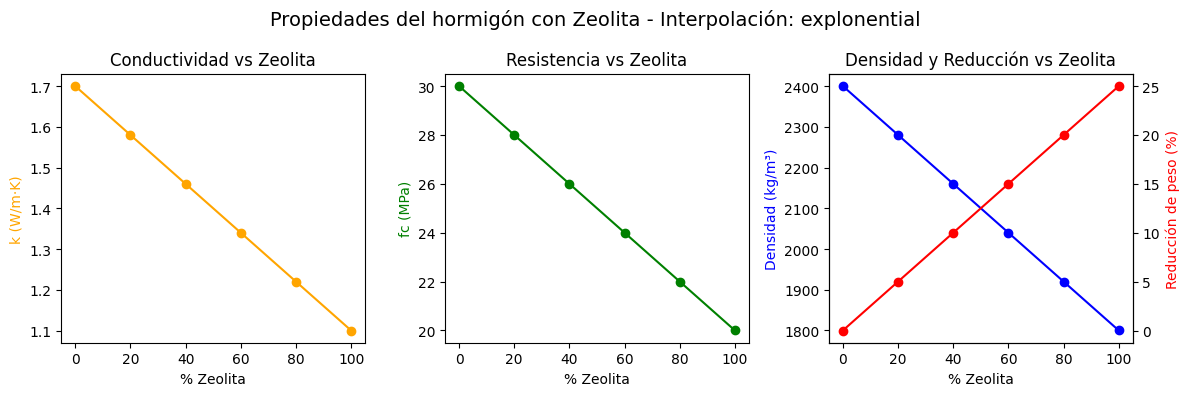


¿Desea exportar los resultados a un archivo CSV? (s/n): s


KeyboardInterrupt: Interrupted by user

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Diccionario con valores de referencia para hormigón tradicional y hormigón con zeolita
REFERENCIAS = {
    'k_tradicional': 1.7,      # W/m·K, hormigón convencional
    'k_zeolita': 1.1,          # W/m·K, hormigón ligero (con alto % de zeolita)
    'fc_tradicional': 30.0,    # MPa, resistencia a compresión hormigón convencional (C30)
    'fc_zeolita': 20.0,        # MPa, hormigón ligero
    'dens_tradicional': 2400.0,# kg/m3, hormigón convencional
    'dens_zeolita': 1800.0     # kg/m3, hormigón ligero con zeolita
}

def calc_properties(perc_zeolita, refs, interpolation='linear'):
    """
    Calcula la conductividad térmica (k), la resistencia a compresión (fc) y la densidad (dens),
    así como la reducción de peso (%) respecto a un hormigón tradicional, para un porcentaje
    de zeolita dado (perc_zeolita).

    Parámetros:
    -----------
    perc_zeolita : float
        Porcentaje de zeolita en la mezcla (0-100).
    refs : dict
        Diccionario con los valores de referencia para hormigón tradicional y hormigón con zeolita.
    interpolation : str
        Tipo de interpolación a utilizar: 'linear' (por defecto) o 'exponential' (como ejemplo de alternativa).

    Retorna:
    --------
    k_mix : float
        Conductividad térmica (W/m·K) estimada para el porcentaje de zeolita dado.
    fc_mix : float
        Resistencia a compresión (MPa) estimada.
    dens_mix : float
        Densidad (kg/m³) estimada.
    reduccion : float
        Reducción de peso (%) respecto a un hormigón tradicional de densidad refs['dens_tradicional'].
    """
    # Asegurar que el porcentaje esté en [0, 100]
    p = max(0, min(perc_zeolita, 100)) / 100.0

    # Interpolación de la conductividad térmica
    if interpolation == 'linear':
        k_mix = (1 - p)*refs['k_tradicional'] + p*refs['k_zeolita']
    elif interpolation == 'exponential':
        # Ejemplo de modelo exponencial (parámetros ajustados arbitrariamente):
        k_mix = refs['k_tradicional'] * np.exp(-0.5 * p)
        # Ajustar a conveniencia según datos reales
    else:
        # Por defecto, lineal
        k_mix = (1 - p)*refs['k_tradicional'] + p*refs['k_zeolita']

    # Interpolación de la resistencia a compresión
    if interpolation == 'linear':
        fc_mix = (1 - p)*refs['fc_tradicional'] + p*refs['fc_zeolita']
    elif interpolation == 'exponential':
        # Modelo exponencial de ejemplo (parámetros arbitrarios)
        fc_mix = refs['fc_tradicional'] - (refs['fc_tradicional'] - refs['fc_zeolita']) * (1 - np.exp(-3 * p))
    else:
        fc_mix = (1 - p)*refs['fc_tradicional'] + p*refs['fc_zeolita']

    # Interpolación de la densidad
    if interpolation == 'linear':
        dens_mix = (1 - p)*refs['dens_tradicional'] + p*refs['dens_zeolita']
    elif interpolation == 'exponential':
        # Modelo exponencial de ejemplo
        dens_mix = refs['dens_tradicional'] - (refs['dens_tradicional'] - refs['dens_zeolita'])*(1 - np.exp(-3*p))
    else:
        dens_mix = (1 - p)*refs['dens_tradicional'] + p*refs['dens_zeolita']

    # Cálculo de la reducción de peso (%)
    dens_trad = refs['dens_tradicional']
    reduccion = (1 - dens_mix / dens_trad) * 100

    return k_mix, fc_mix, dens_mix, reduccion

def export_to_csv(filename, porcentajes, conductividades, resistencias, densidades, reducciones):
    """
    Exporta los resultados de la simulación a un archivo CSV.
    """
    with open(filename, mode='w', newline='') as f:
        writer = csv.writer(f)
        # Encabezados
        writer.writerow(["% Zeolita", "Conductividad (W/mK)", "Resistencia (MPa)",
                         "Densidad (kg/m3)", "Reducción de peso (%)"])
        # Filas
        for p, k, fc, d, r in zip(porcentajes, conductividades, resistencias, densidades, reducciones):
            writer.writerow([p, round(k, 3), round(fc, 2), round(d, 1), round(r, 2)])

def main():
    print("=== Simulación de propiedades de un hormigón con zeolita ===")
    print("1) Se calculará la conductividad térmica, resistencia a compresión, densidad y % de reducción de peso.")
    print("2) Puedes introducir varios valores de porcentaje separados por comas (ej: 0, 20, 40, 60, 80, 100).")

    # Leer valores de porcentaje de zeolita
    entrada = input("Ingrese las proporciones de zeolita a probar (en %, separadas por comas): ")
    entrada = entrada.replace('%', '')
    entrada = entrada.replace(',', ' ')
    valores_str = entrada.split()

    # Leer tipo de interpolación
    print("\nOpciones de interpolación disponibles: 'linear' (por defecto) o 'exponential'.")
    interpolation_type = input("Ingrese el tipo de interpolación (o presione Enter para 'linear'): ")
    if interpolation_type.strip() == '':
        interpolation_type = 'linear'

    porcentajes = []
    for val in valores_str:
        try:
            p_float = float(val)
            porcentajes.append(p_float)
        except ValueError:
            print(f"Valor no válido ignorado: '{val}'")

    # Ordenar y quitar duplicados
    porcentajes = sorted(set(porcentajes))

    if not porcentajes:
        print("No se han proporcionado porcentajes válidos. Saliendo del programa...")
        return

    # Cálculo de propiedades para cada porcentaje
    conductividades = []
    resistencias = []
    densidades = []
    reducciones = []

    for p in porcentajes:
        k_mix, fc_mix, dens_mix, red = calc_properties(p, REFERENCIAS, interpolation=interpolation_type)
        conductividades.append(k_mix)
        resistencias.append(fc_mix)
        densidades.append(dens_mix)
        reducciones.append(red)

    # Mostrar resultados en consola
    print("\nResultados de la simulación:\n")
    print(f"{'Porc. Zeolita (%)':>16} | {'k (W/mK)':>12} | {'fc (MPa)':>12} | {'Dens (kg/m3)':>14} | {'Reducción (%)':>14}")
    for (p, k, fc, d, r) in zip(porcentajes, conductividades, resistencias, densidades, reducciones):
        print(f"{p:16.1f} | {k:12.3f} | {fc:12.2f} | {d:14.1f} | {r:14.2f}")

    # Graficar resultados
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle("Propiedades del hormigón con Zeolita - Interpolación: " + interpolation_type, fontsize=14)

    # Subplot 1: Conductividad térmica
    axes[0].plot(porcentajes, conductividades, marker='o', color='orange', label='Conductividad')
    axes[0].set_xlabel('% Zeolita')
    axes[0].set_ylabel('k (W/m·K)', color='orange')
    axes[0].set_title('Conductividad vs Zeolita')

    # Subplot 2: Resistencia a compresión
    axes[1].plot(porcentajes, resistencias, marker='o', color='green', label='Resistencia')
    axes[1].set_xlabel('% Zeolita')
    axes[1].set_ylabel('fc (MPa)', color='green')
    axes[1].set_title('Resistencia vs Zeolita')

    # Subplot 3: Densidad y Reducción de peso
    axes[2].plot(porcentajes, densidades, marker='o', color='blue', label='Densidad (kg/m³)')
    ax2 = axes[2].twinx()
    ax2.plot(porcentajes, reducciones, marker='o', color='red', label='Reducción (%)')
    axes[2].set_xlabel('% Zeolita')
    axes[2].set_ylabel('Densidad (kg/m³)', color='blue')
    ax2.set_ylabel('Reducción de peso (%)', color='red')
    axes[2].set_title('Densidad y Reducción vs Zeolita')

    plt.tight_layout()
    plt.show()

    # Preguntar si se desea exportar los resultados a CSV
    exportar = input("\n¿Desea exportar los resultados a un archivo CSV? (s/n): ")
    if exportar.lower() in ['s', 'si']:
        filename = input("Ingrese el nombre del archivo CSV (ej: resultados.csv): ")
        export_to_csv(filename, porcentajes, conductividades, resistencias, densidades, reducciones)
        print(f"Resultados guardados en '{filename}'.")

if __name__ == '__main__':
    main()


=== Simulación de propiedades de un hormigón con Zeolita (versión mejorada) ===
Se calcularán: Conductividad térmica, Resistencia a compresión, Densidad, Reducción de peso,
Coste económico y Huella de carbono para distintos porcentajes de zeolita.

Ingrese las proporciones de zeolita a probar (en %, separadas por comas): 10,20,30,40,50,90,100

Opciones de interpolación disponibles: 'linear' (por defecto) o 'exponential'.
Ingrese el tipo de interpolación (o presione Enter para 'linear'): exponential

Resultados de la simulación:

Porc. Zeolita |   k (W/mK) |   fc (MPa) |   Dens (kg/m3) |  Reducción (%) |   Coste (€/m3) |  CO2 (kg/m3)
        10.0 |      1.617 |      27.41 |         2244.5 |           6.48 |          83.19 |       281.87
        20.0 |      1.538 |      25.49 |         2129.3 |          11.28 |          81.70 |       267.03
        30.0 |      1.463 |      24.07 |         2043.9 |          14.84 |          80.49 |       254.88
        40.0 |      1.392 |      23.01 |    

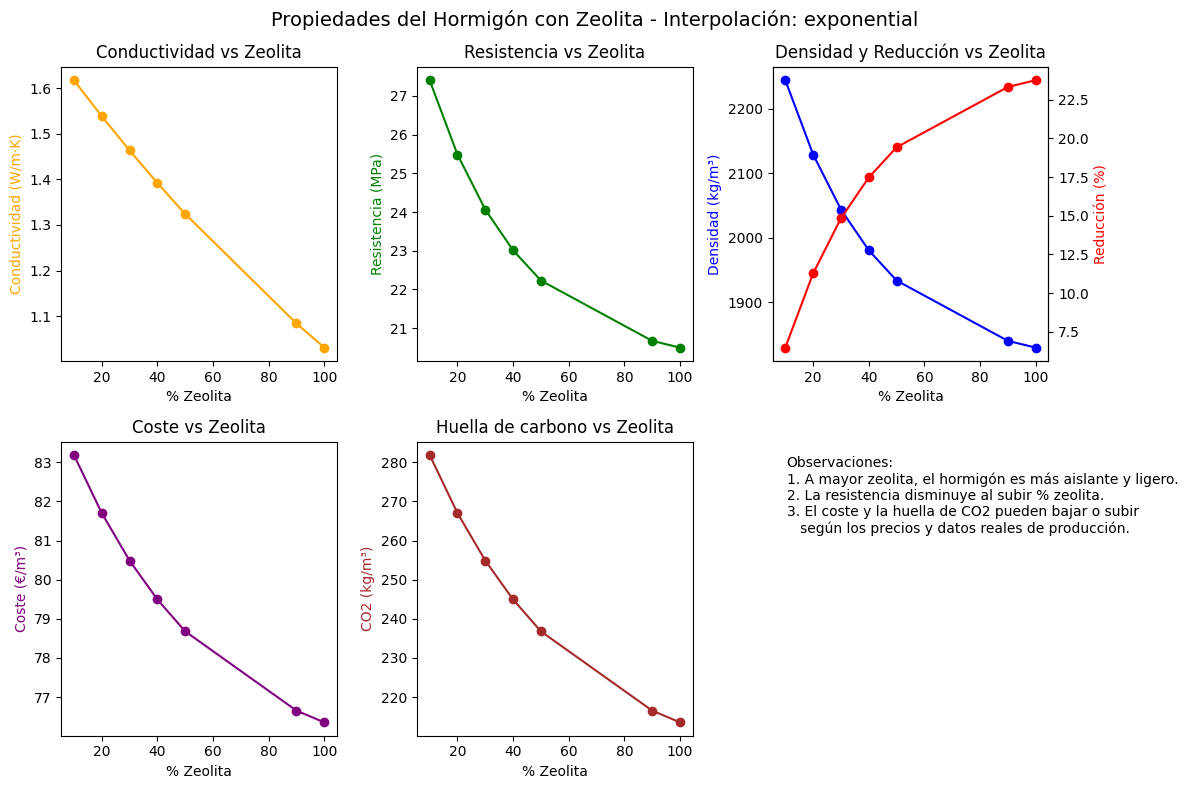

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Diccionario con valores de referencia para hormigón tradicional y hormigón con zeolita
# Ajusta estos valores según tus datos experimentales o fuentes bibliográficas.
REFERENCIAS = {
    # Conductividad térmica (W/m·K)
    'k_tradicional': 1.7,      # Hormigón convencional
    'k_zeolita': 1.1,          # Hormigón ligero (alto contenido de zeolita)

    # Resistencia a compresión (MPa)
    'fc_tradicional': 30.0,    # Hormigón convencional (p.ej. C30)
    'fc_zeolita': 20.0,        # Hormigón ligero (ejemplo)

    # Densidad (kg/m³)
    'dens_tradicional': 2400.0, # Hormigón convencional
    'dens_zeolita': 1800.0,     # Hormigón ligero con zeolita

    # Coste económico (€/m³)
    'cost_trad': 85.0,         # Coste estimado hormigón convencional
    'cost_zeolita': 75.0,      # Coste estimado hormigón con zeolita

    # Huella de carbono (kg CO2/m³)
    'co2_trad': 300.0,         # Emisiones para hormigón convencional (ejemplo)
    'co2_zeolita': 200.0       # Emisiones para hormigón con zeolita (ejemplo)
}

def calc_properties(perc_zeolita, refs, interpolation='linear'):
    """
    Calcula propiedades del hormigón en función del % de zeolita:
      - Conductividad térmica (k_mix)
      - Resistencia a compresión (fc_mix)
      - Densidad (dens_mix)
      - Reducción de peso respecto al hormigón tradicional (%)
      - Coste económico (cost_mix)
      - Huella de carbono (co2_mix)

    Parámetros
    ----------
    perc_zeolita : float
        Porcentaje de zeolita en la mezcla (0 a 100).
    refs : dict
        Diccionario con los valores de referencia (ver arriba).
    interpolation : str
        Tipo de interpolación: 'linear' o 'exponential'.

    Retorna
    -------
    k_mix, fc_mix, dens_mix, reduccion, cost_mix, co2_mix : float
    """
    # Forzamos el porcentaje al rango [0, 100]
    p = max(0, min(perc_zeolita, 100)) / 100.0

    # === Conductividad térmica ===
    if interpolation == 'linear':
        k_mix = (1 - p)*refs['k_tradicional'] + p*refs['k_zeolita']
    elif interpolation == 'exponential':
        # Ejemplo de modelo exponencial (parámetros arbitrarios)
        k_mix = refs['k_tradicional'] * np.exp(-0.5 * p)
    else:
        k_mix = (1 - p)*refs['k_tradicional'] + p*refs['k_zeolita']

    # === Resistencia a compresión ===
    if interpolation == 'linear':
        fc_mix = (1 - p)*refs['fc_tradicional'] + p*refs['fc_zeolita']
    elif interpolation == 'exponential':
        # Ejemplo de modelo exponencial
        fc_mix = refs['fc_tradicional'] - (refs['fc_tradicional'] - refs['fc_zeolita']) * (1 - np.exp(-3 * p))
    else:
        fc_mix = (1 - p)*refs['fc_tradicional'] + p*refs['fc_zeolita']

    # === Densidad ===
    if interpolation == 'linear':
        dens_mix = (1 - p)*refs['dens_tradicional'] + p*refs['dens_zeolita']
    elif interpolation == 'exponential':
        dens_mix = refs['dens_tradicional'] - (refs['dens_tradicional'] - refs['dens_zeolita']) * (1 - np.exp(-3*p))
    else:
        dens_mix = (1 - p)*refs['dens_tradicional'] + p*refs['dens_zeolita']

    # === Reducción de peso (%) ===
    dens_trad = refs['dens_tradicional']
    reduccion = (1 - dens_mix / dens_trad) * 100

    # === Coste económico ===
    if interpolation == 'linear':
        cost_mix = (1 - p)*refs['cost_trad'] + p*refs['cost_zeolita']
    elif interpolation == 'exponential':
        # Ejemplo de modelo exponencial (se podría ajustar con datos reales)
        cost_mix = refs['cost_trad'] - (refs['cost_trad'] - refs['cost_zeolita']) * (1 - np.exp(-2 * p))
    else:
        cost_mix = (1 - p)*refs['cost_trad'] + p*refs['cost_zeolita']

    # === Huella de carbono (kg CO2/m³) ===
    if interpolation == 'linear':
        co2_mix = (1 - p)*refs['co2_trad'] + p*refs['co2_zeolita']
    elif interpolation == 'exponential':
        co2_mix = refs['co2_trad'] - (refs['co2_trad'] - refs['co2_zeolita'])*(1 - np.exp(-2 * p))
    else:
        co2_mix = (1 - p)*refs['co2_trad'] + p*refs['co2_zeolita']

    return k_mix, fc_mix, dens_mix, reduccion, cost_mix, co2_mix

def export_to_csv(filename, porcentajes, resultados):
    """
    Exporta los resultados de la simulación a un archivo CSV.

    Parámetros
    ----------
    filename : str
        Nombre del archivo CSV de salida.
    porcentajes : list of float
        Lista de porcentajes de zeolita.
    resultados : dict
        Diccionario con listas de cada propiedad calculada.
    """
    with open(filename, mode='w', newline='') as f:
        writer = csv.writer(f)
        # Escribimos la cabecera
        writer.writerow([
            "% Zeolita",
            "Conductividad (W/mK)",
            "Resistencia (MPa)",
            "Densidad (kg/m3)",
            "Reducción (%)",
            "Coste (€/m3)",
            "CO2 (kg/m3)"
        ])
        # Escribimos fila a fila
        for i, p in enumerate(porcentajes):
            writer.writerow([
                p,
                round(resultados['conductividades'][i], 3),
                round(resultados['resistencias'][i], 2),
                round(resultados['densidades'][i], 1),
                round(resultados['reducciones'][i], 2),
                round(resultados['costes'][i], 2),
                round(resultados['co2'][i], 2)
            ])

def main():
    print("=== Simulación de propiedades de un hormigón con Zeolita (versión mejorada) ===")
    print("Se calcularán: Conductividad térmica, Resistencia a compresión, Densidad, Reducción de peso,")
    print("Coste económico y Huella de carbono para distintos porcentajes de zeolita.\n")

    # Leer valores de porcentaje de zeolita
    entrada = input("Ingrese las proporciones de zeolita a probar (en %, separadas por comas): ")
    entrada = entrada.replace('%', '')
    entrada = entrada.replace(',', ' ')
    valores_str = entrada.split()

    # Tipo de interpolación
    print("\nOpciones de interpolación disponibles: 'linear' (por defecto) o 'exponential'.")
    interpolation_type = input("Ingrese el tipo de interpolación (o presione Enter para 'linear'): ")
    if interpolation_type.strip() == '':
        interpolation_type = 'linear'

    porcentajes = []
    for val in valores_str:
        try:
            p_float = float(val)
            porcentajes.append(p_float)
        except ValueError:
            print(f"Valor no válido ignorado: '{val}'")

    # Ordenar y quitar duplicados
    porcentajes = sorted(set(p for p in porcentajes if p >= 0 and p <= 100))

    if not porcentajes:
        print("No se han proporcionado porcentajes válidos (entre 0 y 100). Saliendo...")
        return

    # Listas para almacenar los resultados
    conductividades = []
    resistencias = []
    densidades = []
    reducciones = []
    costes = []
    co2s = []

    # Calcular las propiedades para cada porcentaje
    for p in porcentajes:
        k_mix, fc_mix, dens_mix, red, cost_mix, co2_mix = calc_properties(
            p,
            REFERENCES,
            interpolation=interpolation_type
        )
        conductividades.append(k_mix)
        resistencias.append(fc_mix)
        densidades.append(dens_mix)
        reducciones.append(red)
        costes.append(cost_mix)
        co2s.append(co2_mix)

    # Mostramos en consola
    print("\nResultados de la simulación:\n")
    print(f"{'Porc. Zeolita':>12} | {'k (W/mK)':>10} | {'fc (MPa)':>10} | {'Dens (kg/m3)':>14} | {'Reducción (%)':>14} | {'Coste (€/m3)':>14} | {'CO2 (kg/m3)':>12}")
    for i, p in enumerate(porcentajes):
        print(f"{p:12.1f} | {conductividades[i]:10.3f} | {resistencias[i]:10.2f} | {densidades[i]:14.1f} | {reducciones[i]:14.2f} | {costes[i]:14.2f} | {co2s[i]:12.2f}")

    # Crear un diccionario para exportar y graficar
    resultados = {
        'conductividades': conductividades,
        'resistencias': resistencias,
        'densidades': densidades,
        'reducciones': reducciones,
        'costes': costes,
        'co2': co2s
    }

    # Graficar en una sola figura con 2x3 subplots
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle("Propiedades del Hormigón con Zeolita - Interpolación: " + interpolation_type, fontsize=14)

    # Subplot (0,0): Conductividad térmica
    axes[0,0].plot(porcentajes, conductividades, marker='o', color='orange')
    axes[0,0].set_xlabel('% Zeolita')
    axes[0,0].set_ylabel('Conductividad (W/m·K)', color='orange')
    axes[0,0].set_title('Conductividad vs Zeolita')

    # Subplot (0,1): Resistencia a compresión
    axes[0,1].plot(porcentajes, resistencias, marker='o', color='green')
    axes[0,1].set_xlabel('% Zeolita')
    axes[0,1].set_ylabel('Resistencia (MPa)', color='green')
    axes[0,1].set_title('Resistencia vs Zeolita')

    # Subplot (0,2): Densidad y Reducción de peso
    axes[0,2].plot(porcentajes, densidades, marker='o', color='blue', label='Densidad')
    ax2 = axes[0,2].twinx()
    ax2.plot(porcentajes, reducciones, marker='o', color='red', label='Reducción')
    axes[0,2].set_xlabel('% Zeolita')
    axes[0,2].set_ylabel('Densidad (kg/m³)', color='blue')
    ax2.set_ylabel('Reducción (%)', color='red')
    axes[0,2].set_title('Densidad y Reducción vs Zeolita')

    # Subplot (1,0): Coste económico
    axes[1,0].plot(porcentajes, costes, marker='o', color='purple')
    axes[1,0].set_xlabel('% Zeolita')
    axes[1,0].set_ylabel('Coste (€/m³)', color='purple')
    axes[1,0].set_title('Coste vs Zeolita')

    # Subplot (1,1): Huella de carbono
    axes[1,1].plot(porcentajes, co2s, marker='o', color='brown')
    axes[1,1].set_xlabel('% Zeolita')
    axes[1,1].set_ylabel('CO2 (kg/m³)', color='brown')
    axes[1,1].set_title('Huella de carbono vs Zeolita')

    # Subplot (1,2) vacío o para texto adicional
    axes[1,2].axis('off')
    # Ejemplo: mostrar un texto o una pequeña leyenda
    texto_info = (
        "Observaciones:\n"
        "1. A mayor zeolita, el hormigón es más aislante y ligero.\n"
        "2. La resistencia disminuye al subir % zeolita.\n"
        "3. El coste y la huella de CO2 pueden bajar o subir\n"
        "   según los precios y datos reales de producción.\n"
    )
    axes[1,2].text(0.05, 0.95, texto_info, va='top', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Preguntar si se desea exportar resultados a CSV
    exportar = input("\n¿Desea exportar los resultados a un archivo CSV? (s/n): ")
    if exportar.lower() in ['s', 'si']:
        filename = input("Ingrese el nombre del archivo CSV (ej: resultados.csv): ")
        export_to_csv(filename, porcentajes, resultados)
        print(f"Resultados guardados en '{filename}'.")

if __name__ == '__main__':
    # Nota: renombra 'REFERENCES' a 'REFERENCIAS' para mantener consistencia en español
    REFERENCES = REFERENCIAS
    main()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,030 (11.84 KB)

 Trainable params: 3,030 (11.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - loss: 0.9609 - mae: 0.8134 - val_loss: 0.9238 - val_mae: 0.7987
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8508 - mae: 0.7711 - val_loss: 0.8207 - val_mae: 0.7482
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7827 - mae: 0.7324 - val_loss: 0.6978 - val_mae: 0.6848
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6665 - mae: 0.6754 - val_loss: 0.5594 - val_mae: 0.6051
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4875 - mae: 0.5695 - val_loss: 0.4266 - val_mae: 0.5239
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3912 - mae: 0.4995 - val_loss: 0.3293 - val_mae: 0.4525
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2989 - mae: 0.4294 - val_loss: 0.2619 - val_mae: 0.3991
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2618 - mae: 0.3963 - val_loss: 0.2156 - val_mae: 0.3579
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0

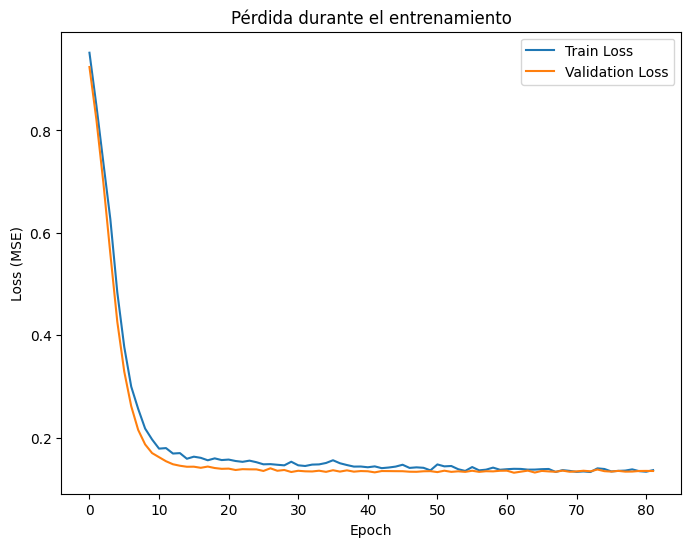

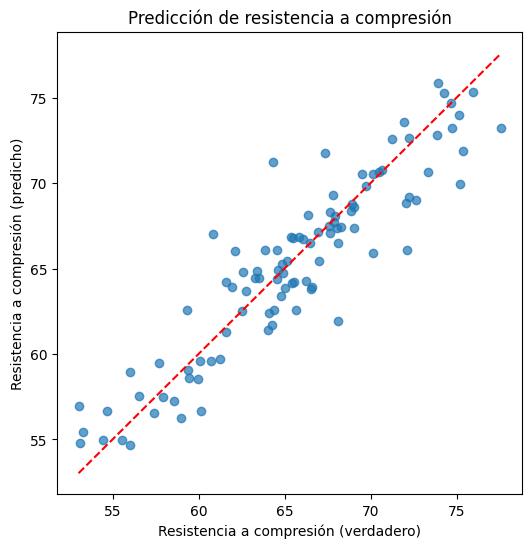

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

def load_data(file_path):
    """
    Lee el dataset desde un archivo CSV.
    Se espera que el CSV contenga columnas:
    'percent_zeolite', 'water_cement', 'total_binder', 'age',
    'compressive_strength', 'flexural_strength', 'density',
    'thermal_conductivity', 'cost', 'CO2'
    """
    df = pd.read_csv(file_path)
    return df

def create_synthetic_data(num_samples=500):
    """
    Genera un dataset sintético para demostrar el modelo.

    Las variables de entrada son:
      - percent_zeolite: % de zeolita (0 a 40)
      - water_cement: relación agua/cemento (0.4 a 0.6)
      - total_binder: contenido total de aglomerante (300 a 400 kg/m³)
      - age: edad de curado (7 a 90 días)

    Las salidas (propiedades del hormigón) se simulan con funciones arbitrarias:
      - compressive_strength (MPa)
      - flexural_strength (MPa)
      - density (kg/m³)
      - thermal_conductivity (W/m·K)
      - cost (€/m³)
      - CO2 (kg/m³)
    """
    np.random.seed(42)
    percent_zeolite = np.random.uniform(0, 40, num_samples)  # 0 a 40%
    water_cement = np.random.uniform(0.4, 0.6, num_samples)
    total_binder = np.random.uniform(300, 400, num_samples)
    age = np.random.uniform(7, 90, num_samples)

    # Simulación de salidas (estas funciones son ejemplos y deben ajustarse con datos reales)
    compressive_strength = 40 - percent_zeolite * 0.3 + total_binder * 0.05 + np.log(age) * 5 - water_cement * 10 + np.random.normal(0, 2, num_samples)
    flexural_strength = compressive_strength * 0.15 + np.random.normal(0, 0.5, num_samples)
    density = 2400 - percent_zeolite * 10 + np.random.normal(0, 15, num_samples)
    thermal_conductivity = 1.7 - percent_zeolite * 0.01 + np.random.normal(0, 0.05, num_samples)
    cost = 90 - percent_zeolite * 0.2 + np.random.normal(0, 1, num_samples)
    CO2 = 350 - percent_zeolite * 3 + np.random.normal(0, 5, num_samples)

    df = pd.DataFrame({
        'percent_zeolite': percent_zeolite,
        'water_cement': water_cement,
        'total_binder': total_binder,
        'age': age,
        'compressive_strength': compressive_strength,
        'flexural_strength': flexural_strength,
        'density': density,
        'thermal_conductivity': thermal_conductivity,
        'cost': cost,
        'CO2': CO2
    })
    return df

def preprocess_data(df, feature_cols, target_cols):
    """
    Separa los datos en variables de entrada (X) y salidas (y) y aplica normalización.
    Devuelve X e y escalados, junto con los escaladores para revertir la normalización.
    """
    X = df[feature_cols].values
    y = df[target_cols].values
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    return X_scaled, y_scaled, scaler_X, scaler_y

def build_model(input_dim, output_dim):
    """
    Construye y compila un modelo de red neuronal profunda (MLP).

    La arquitectura propuesta es:
      - Capa oculta de 64 neuronas con ReLU y Dropout (0.1)
      - Capa oculta de 32 neuronas con ReLU
      - Capa oculta de 16 neuronas con ReLU
      - Capa de salida lineal con 'output_dim' neuronas
    """
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(output_dim, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def main():
    # Opción para cargar datos de CSV o usar dataset sintético
    use_csv = False  # Cambia a True si tienes un archivo CSV con datos reales
    if use_csv:
        file_path = 'datos_hormigon_zeolita.csv'
        df = load_data(file_path)
    else:
        df = create_synthetic_data(num_samples=500)

    # Definir variables de entrada y salidas
    feature_cols = ['percent_zeolite', 'water_cement', 'total_binder', 'age']
    target_cols = ['compressive_strength', 'flexural_strength', 'density', 'thermal_conductivity', 'cost', 'CO2']

    X_scaled, y_scaled, scaler_X, scaler_y = preprocess_data(df, feature_cols, target_cols)

    # División de datos: 80% entrenamiento, 20% prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

    # Construir y resumir el modelo
    model = build_model(input_dim=X_scaled.shape[1], output_dim=y_scaled.shape[1])
    model.summary()

    # Configurar EarlyStopping para evitar sobreajuste
    es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    # Entrenar el modelo
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32, callbacks=[es], verbose=1)

    # Evaluar el modelo en el conjunto de prueba
    loss, mae = model.evaluate(X_test, y_test)
    print("Test Loss (MSE):", loss)
    print("Test MAE:", mae)

    # Realizar predicciones y revertir la normalización
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    # Crear un DataFrame comparativo con algunas predicciones
    results = pd.DataFrame(y_true, columns=target_cols)
    results['pred_compressive_strength'] = y_pred[:, 0]
    results['pred_flexural_strength'] = y_pred[:, 1]
    results['pred_density'] = y_pred[:, 2]
    results['pred_thermal_conductivity'] = y_pred[:, 3]
    results['pred_cost'] = y_pred[:, 4]
    results['pred_CO2'] = y_pred[:, 5]
    print("\nEjemplo de resultados (primeras 5 filas):")
    print(results.head())

    # Graficar la pérdida durante el entrenamiento
    plt.figure(figsize=(8,6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title("Pérdida durante el entrenamiento")
    plt.legend()
    plt.show()

    # Graficar la correlación entre valores verdaderos y predichos para la resistencia a compresión
    plt.figure(figsize=(6,6))
    plt.scatter(y_true[:, 0], y_pred[:, 0], alpha=0.7)
    plt.xlabel("Resistencia a compresión (verdadero)")
    plt.ylabel("Resistencia a compresión (predicho)")
    plt.title("Predicción de resistencia a compresión")
    # Línea de identidad
    lim_min = min(y_true[:, 0].min(), y_pred[:, 0].min())
    lim_max = max(y_true[:, 0].max(), y_pred[:, 0].max())
    plt.plot([lim_min, lim_max], [lim_min, lim_max], 'r--')
    plt.show()

if __name__ == '__main__':
    main()
